In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pickle as cPickle
import pandas as pd
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras.layers import LSTM, Dense, TimeDistributed, Bidirectional
import sklearn.metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

from tensorflow.keras import Model
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional
from keras import models

In [ ]:
data_test = "/content/drive/MyDrive/KD2_Predict_ArapUbi/Data/Data for Student/"
path_model = "/content/drive/MyDrive/KD2_Predict_ArapUbi/Model/"
path_result = "/content/drive/MyDrive/KD2_Predict_ArapUbi/Result/"

In [ ]:
def twoTupleDic1():
    AA_list_sort = ['G','A','V','L','I','M','P','F','W','S','T','N','Q','Y','C','K','R','H','D','E','X']

    AA_dict = {}
    numm = 1
    for i in AA_list_sort:
        AA_dict[i] = numm
        numm += 1
    return AA_dict
def ProSentence(pro, K):
	sentence = ""
	length = len(pro)
	for i in range(length - K + 1):
		sentence += pro[i: i + K] + " "
    #delete extra space
	sentence = sentence[0 : len(sentence) - 1]
	return sentence
k =1#1-gram
word_index1 = twoTupleDic1()
vocab_size = len(word_index1)
num_folds = 5
TIME_STEPS = 33
INPUT_SIZE = 300

In [ ]:
# load test data
file_test ="test_data_31_Arathailiana_1_1.csv"
df_test =pd.read_csv(data_test+file_test,delimiter= ',')
text_test =[] #PTMsequend kmer
for i in df_test['Sequence']:
  temp = ProSentence(i,k)
  text_test.append(temp)
df_test['k_mer'] =text_test

test_sequences = []
for each in text_test:
    each_index_list = []
    each = each.split(' ')
    for i in each:
        each_index_list.append(word_index1[i])
    test_sequences.append(each_index_list)

data_token= []
for i in df_test['k_mer']:
   data_token.append(i.split())
MAX_SEQUENCE_LENGTH = len(data_token[1])

Xtest = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
ytest = np.array(df_test['Label'])
# perform one-hot encoding on the labels
ytest = np.array(ytest)
lb = LabelBinarizer()
ytest= lb.fit_transform(ytest)
ytest = to_categorical(ytest)
ytest.shape

(1022, 2)

In [ ]:
from keras import models
model_KD2 = models.load_model(path_model +"KD2_1gram.h5")
y_pred = model_KD2.predict(Xtest)
ypred = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
result22 = confusion_matrix(np.argmax(ytest, axis=1), ypred)
print('Cofusion_matrix:\n',result22)

32/32 [==============================] - 1s 5ms/step
Cofusion_matrix:
 [[431  80]
 [ 60 451]]


In [ ]:
from sklearn.metrics import accuracy_score
print('ACC:',accuracy_score(np.argmax(ytest, axis=1), ypred))

ACC: 0.863013698630137


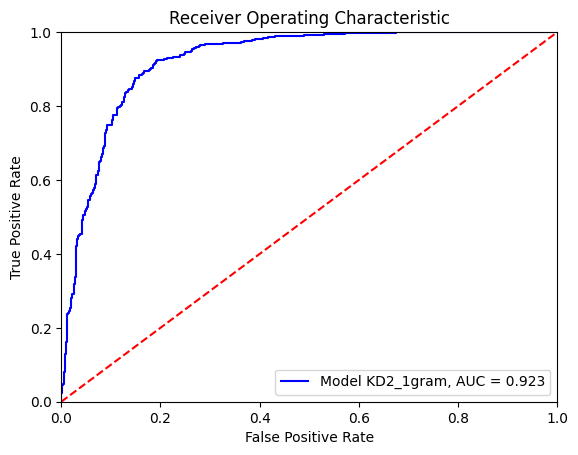

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(ytest[:,1], y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='Model KD2_1gram, AUC = {:.3f}'.format(roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
